## Leitura de imagens não usadas no treinamento para teste de resultado

#### Validação Multiclasse


In [1]:
import torch
from transformers import ViTForImageClassification
import pytorch_lightning as pl
import torch.nn as nn

import sys
import os

dir_raiz = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(dir_raiz)
from classes.modelo import Modelo
from classes.modelo_custom import ModeloCustom

d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\TCC1\VIT-cric\vit-dynamic-patches\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
num_classes = 6
learning_rate = 0.001

### Load Modelo Completo

In [ ]:
# Instancie o modelo
# model = ModeloCustom(num_classes, learning_rate)
model = Modelo(num_classes, learning_rate)

# Carregue o estado do modelo salvo
model.load_state_dict(torch.load('./resultados/google-224-model/google-vit-16-224-100-50-Desbalanceado-RedeDF/modelo_vit_gpu.pth', map_location="cpu"))
model.eval() 

### Load Checkpoint

In [ ]:
model = Modelo.load_from_checkpoint("./models/checkpoint/epoch=4-val_loss=1.31-val_accuracy=0.54.ckpt")
print(model.learning_rate)

In [4]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def get_key_from_value(dicte, target_value):
    for key, value in dicte.items():
        if value == target_value:
            return key
    return None

def avaliarModelo(path_paste):
  all_files_and_dirs = os.listdir(path_paste)

  # Filtra apenas os arquivos
  files = [f for f in all_files_and_dirs if os.path.isfile(os.path.join(path_paste, f))]

  for i, file in enumerate(files):
    
    
    image_path = f"{path_paste}/{file}"
    image = Image.open(image_path).convert('RGB')

    # Transforme a imagem
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image_tensor = transform(image).unsqueeze(0)  # Adicione uma dimensão para o batch

    # Certifique-se de que o modelo está em modo de avaliação
    model.eval()

    with torch.no_grad():
      # Faça a previsão
      output = model(image_tensor)
      probabilities = torch.softmax(output, dim=1)
      prediction = torch.argmax(probabilities, dim=1).item()

    # Exibir a imagem
    plt.imshow(image)
    plt.axis('off')  # Não exibir os eixos
    
    
    dicte = {'ASC-H': 0, 'ASC-US': 1, 'HSIL': 2, 'LSIL': 3, 'Negative for intraepithelial lesion': 4, 'SCC': 5}
    
    retorno = get_key_from_value(dicte=dicte, target_value=prediction)
    
    plt.title(f'Predicted class: {retorno}')
    plt.show()
    
    if i == 15:
      break


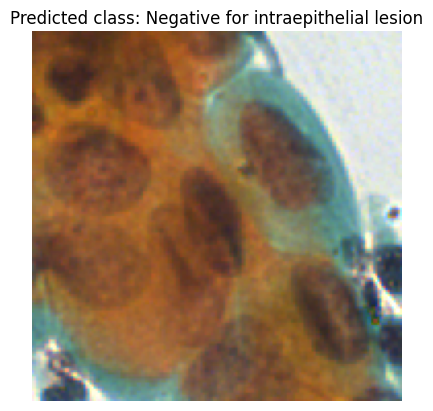

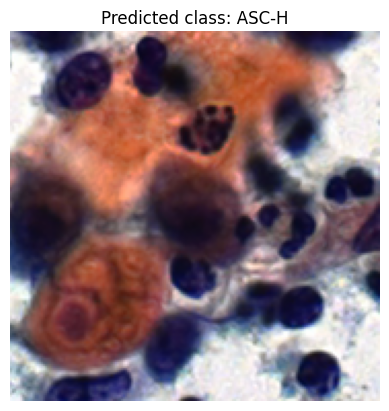

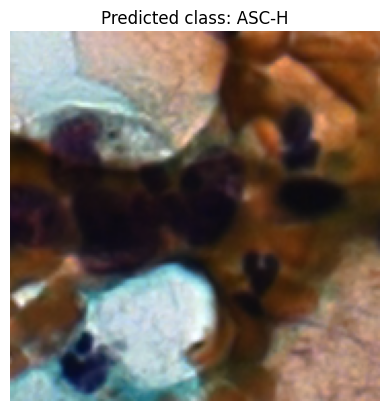

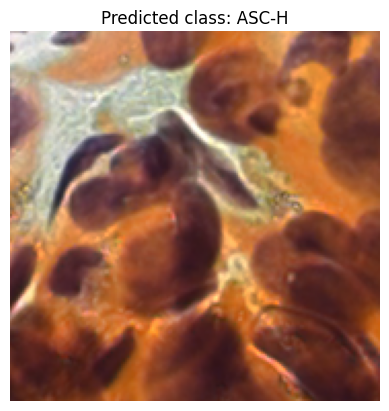

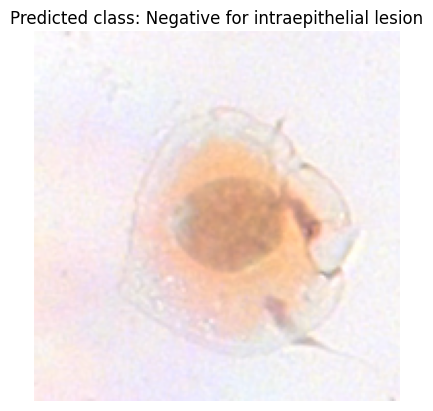

In [5]:
avaliarModelo("data/base_treinamento/validation/ASC-H")

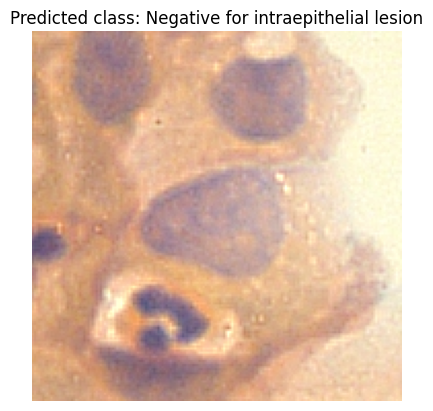

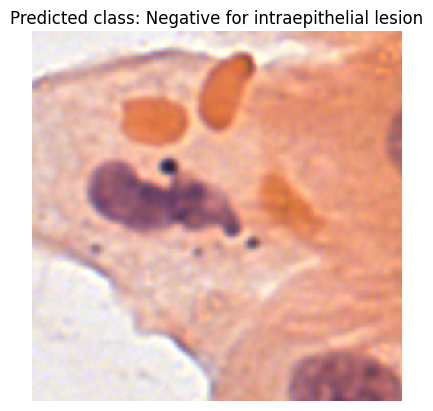

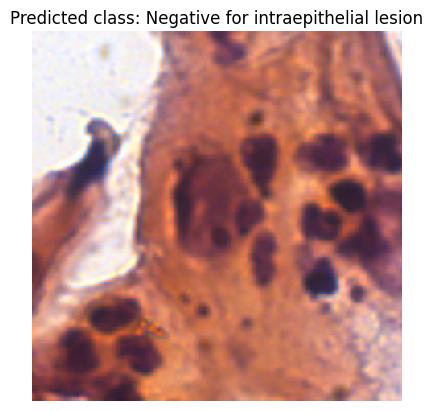

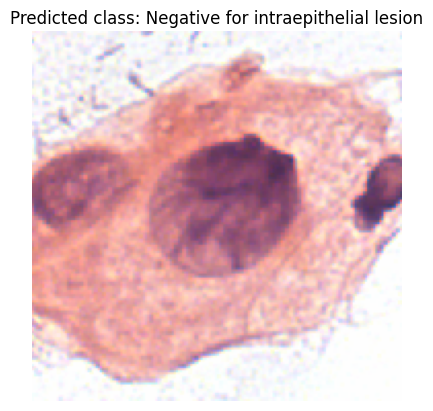

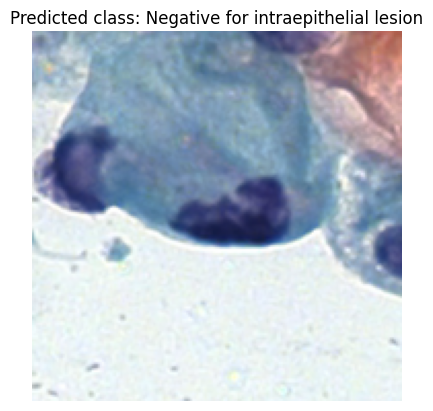

In [6]:
avaliarModelo("data/base_treinamento/validation/ASC-US")

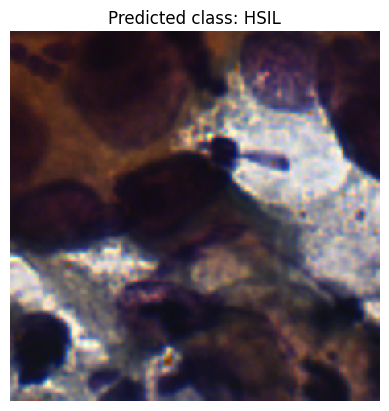

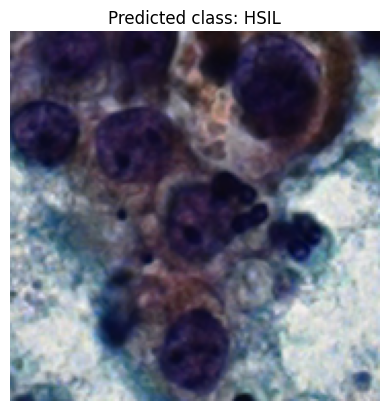

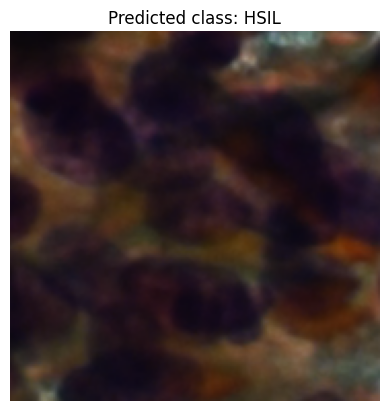

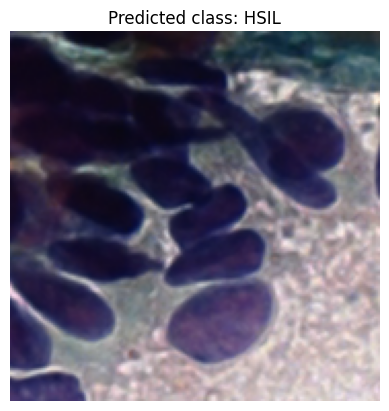

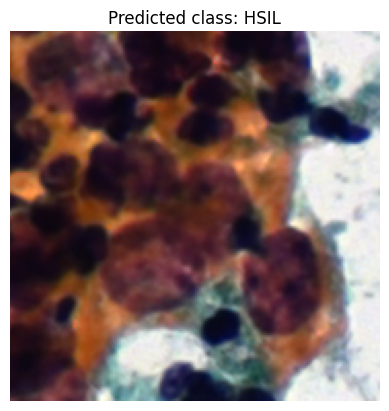

In [7]:
avaliarModelo("data/base_treinamento/validation/HSIL")

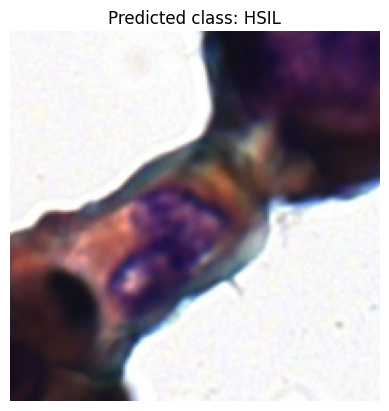

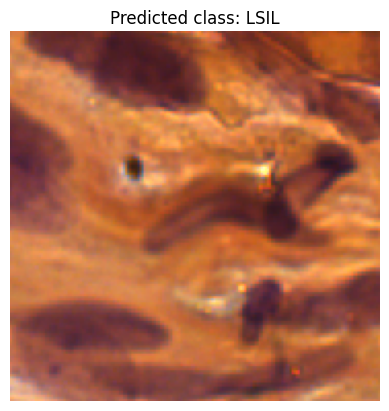

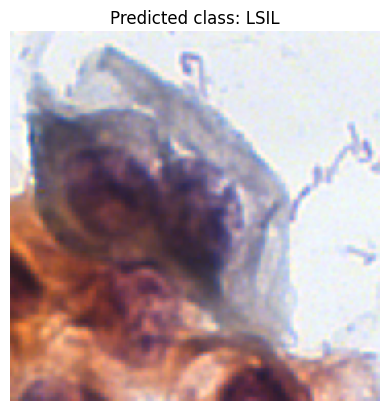

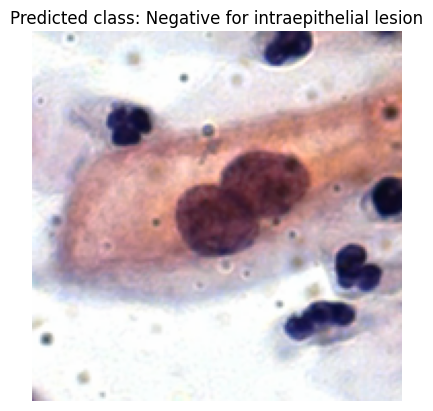

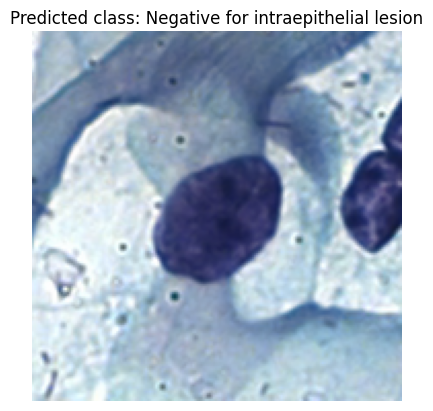

In [8]:
avaliarModelo("data/base_treinamento/validation/LSIL")

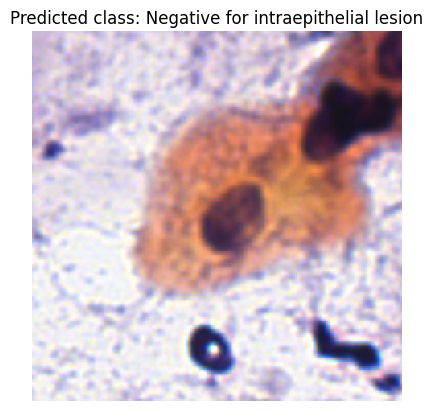

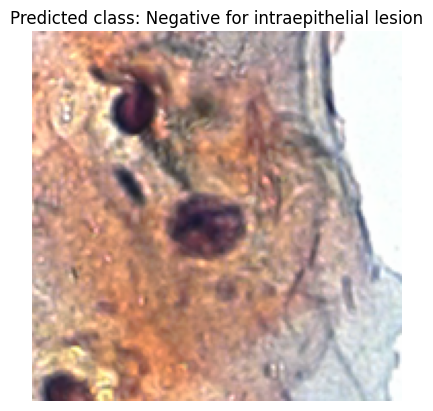

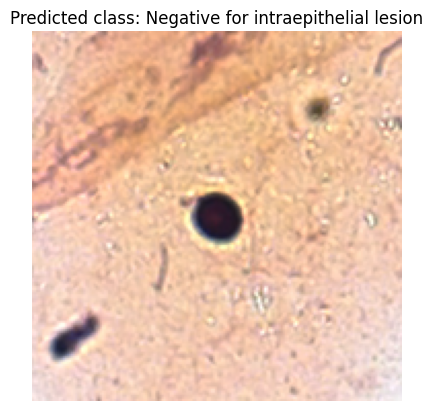

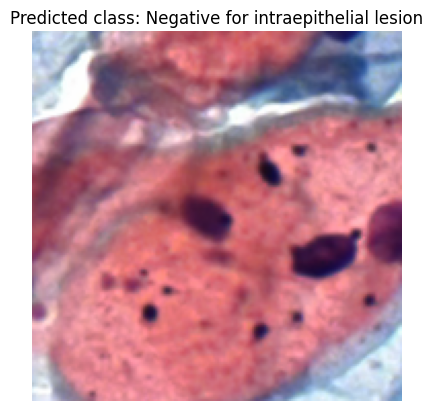

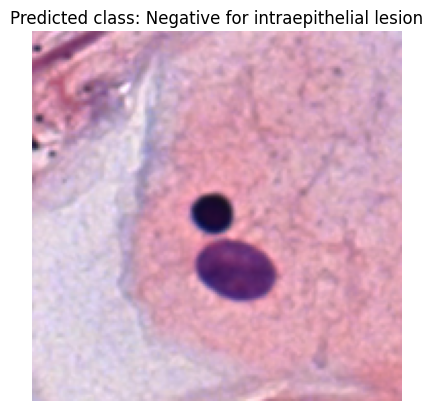

In [9]:
avaliarModelo("data/base_treinamento/validation/Negative for intraepithelial lesion")

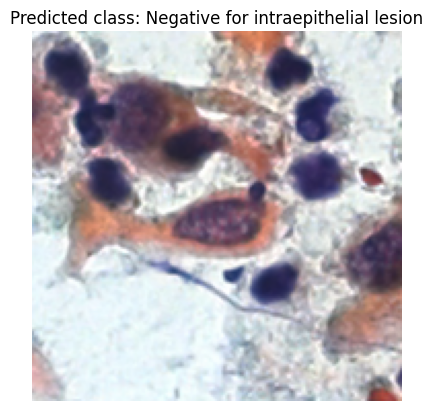

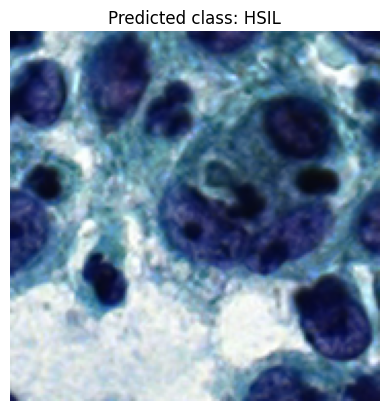

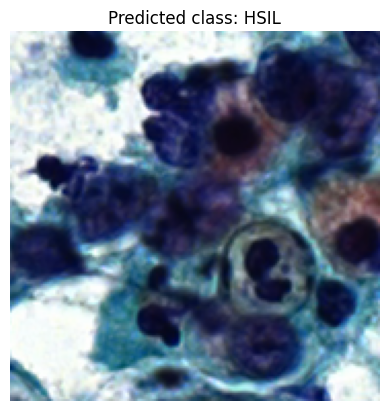

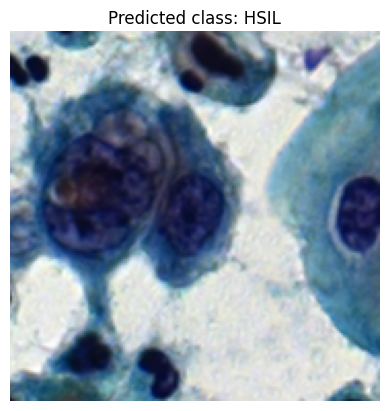

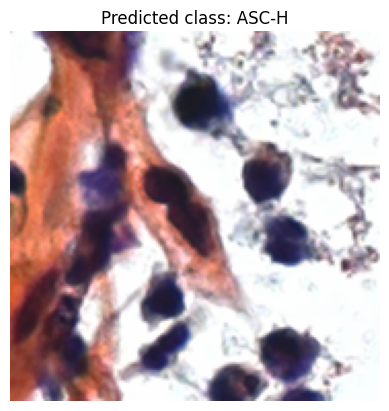

In [10]:
avaliarModelo("data/base_treinamento/validation/SCC")

### Avaliar pelo conjunto de Teste


In [12]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def get_key_from_value(dicte, target_value):
    for key, value in dicte.items():
        if value == target_value:
            return key
    return None

def avaliarModeloNumero(path_paste, resposta):
  all_files_and_dirs = os.listdir(path_paste)

  # Filtra apenas os arquivos
  files = [f for f in all_files_and_dirs if os.path.isfile(os.path.join(path_paste, f))]

  qtd_total = len(files)
  
  contador_certo = 0
  
  for i, file in enumerate(files):
        
    image_path = f"{path_paste}/{file}"
    image = Image.open(image_path).convert('RGB')

    # Transforme a imagem
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image_tensor = transform(image).unsqueeze(0)  # Adicione uma dimensão para o batch

    # Certifique-se de que o modelo está em modo de avaliação
    model.eval()

    with torch.no_grad():
      # Faça a previsão
      output = model(image_tensor)
      probabilities = torch.softmax(output, dim=1)
      prediction = torch.argmax(probabilities, dim=1).item()

    
    dicte = {'ASC-H': 0, 'ASC-US': 1, 'HSIL': 2, 'LSIL': 3, 'Negative for intraepithelial lesion': 4, 'SCC': 5}
    
    retorno = get_key_from_value(dicte=dicte, target_value=prediction)
    
    if retorno == resposta:
      contador_certo += 1
      
  return f'{contador_certo}/{qtd_total}'
    
  

In [13]:
avaliarModeloNumero("data/base_treinamento/test/ASC-H", "ASC-H")

'58/78'

In [14]:
avaliarModeloNumero("data/base_treinamento/test/ASC-US", "ASC-US")

'35/93'

In [15]:
avaliarModeloNumero("data/base_treinamento/test/HSIL", "HSIL")

'238/255'

In [16]:
avaliarModeloNumero("data/base_treinamento/test/LSIL", "LSIL")

'96/153'

In [17]:
avaliarModeloNumero("data/base_treinamento/test/Negative for intraepithelial lesion", "Negative for intraepithelial lesion")

'743/790'

In [18]:
avaliarModeloNumero("data/base_treinamento/test/SCC", "SCC")

'9/29'